## Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Reading "people.in" file (I have renamed it to "people.csv" before using in this code):

In [2]:
df = pd.read_csv('people.csv', sep=';')

In [3]:
df.shape

(2779, 8)

In [4]:
df.head()

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections
0,573435640,jean,harion,vice president,Dominica,Telecommunications,0,0
1,337983069,meredith,kopit-levien,chief revenue officer,United States,Publishing,0,0
2,556570894,daniel,roe,"vp, customer operations and support",United States,Computer Software,0,270
3,646158956,craig,gulliver,"vice president, support services",Canada,Computer Software,0,0
4,345736039,isaac,stringer,vice president,United States,Electronics,0,0


In [5]:
df.describe()

,PersonId,NumberOfRecommendations,NumberOfConnections
count,2.779000e+03,2779.000000,2779.000000
mean,6.396832e+08,0.045700,16.211947
std,3.664072e+07,1.194419,69.382461
min,8.542416e+07,0.000000,0.000000
25%,6.428408e+08,0.000000,0.000000
50%,6.440413e+08,0.000000,0.000000
75%,6.445936e+08,0.000000,0.000000
max,6.463992e+08,60.000000,500.000000


## Some Exploratory Analysis:

In [6]:
df['CurrentRole'].value_counts(dropna=False)

NaN                                                  624
board member                                          39
teacher                                               37
director                                              27
chief executive officer                               24
                                                    ... 
artwork production coordinator                         1
vice president of finance                              1
senior structural engineer                             1
team leader - senior outreach counseling               1
director of delivery services   senior consultant      1
Name: CurrentRole, Length: 1618, dtype: int64

### Insight #01: most people does not have the information of the CurrentRole

In [7]:
df['Country'].value_counts(dropna=False)

United States     1003
United Kingdom     487
Canada             446
Australia          187
Brazil              94
                  ... 
Kuwait               1
Qatar                1
Bangladesh           1
Oman                 1
Estonia              1
Name: Country, Length: 67, dtype: int64

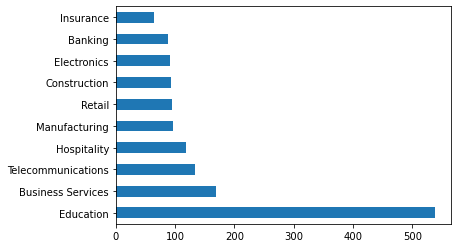

In [8]:
df['Industry'].value_counts(dropna=False).head(10).plot(kind='barh');

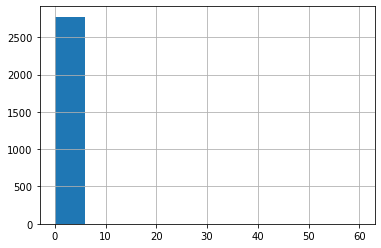

In [9]:
df['NumberOfRecommendations'].hist();

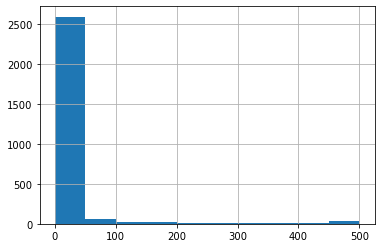

In [10]:
df['NumberOfConnections'].hist();

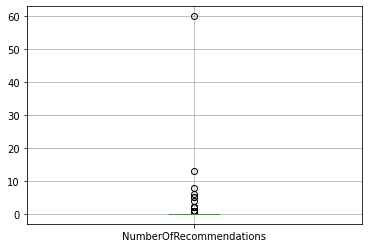

In [11]:
df[['NumberOfRecommendations']].boxplot();

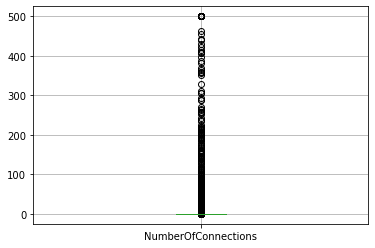

In [12]:
df[['NumberOfConnections']].boxplot();

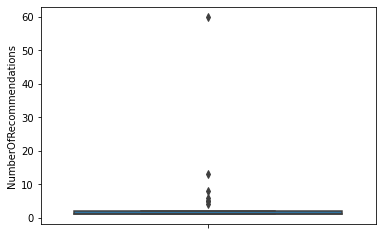

In [13]:
temp_rec = df.query("NumberOfRecommendations > 0")
sns.boxplot(y=temp_rec['NumberOfRecommendations'], showfliers=True);

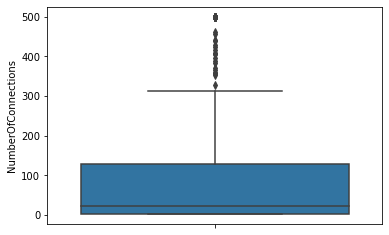

In [14]:
temp_conn = df.query("NumberOfConnections > 0")
sns.boxplot(y=temp_conn['NumberOfConnections'], showfliers=True);

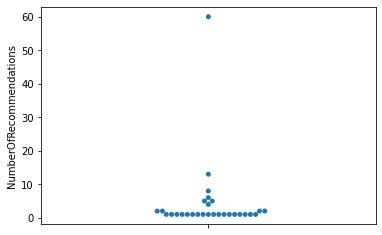

In [15]:
sns.swarmplot(y=temp_rec['NumberOfRecommendations']);

/Users/alex.keila/opt/anaconda3/envs/obp_env/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


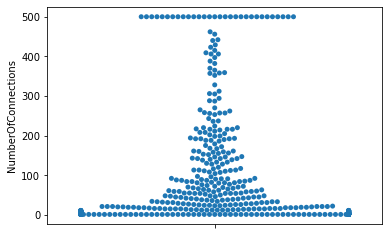

In [16]:
sns.swarmplot(y=temp_conn['NumberOfConnections']);

In [17]:
df.query("NumberOfRecommendations == 0").shape[0]/ df.shape[0] * 100

98.95645915797049

In [18]:
df.query("NumberOfConnections == 0").shape[0]/ df.shape[0] * 100

83.0154731917956

### Insight #02: It seems that most of the people on the dataset has ZERO recommendations

### Insight #03: It seems that most of the people on the dataset has ZERO connections

### First idea: get only people from the LATAM Countries:

In [19]:
lista_countries = list(df['Country'].unique())

In [20]:
lista_countries[0:10]

['Dominica',
 'United States',
 'Canada',
 'Spain',
 'India',
 'United Arab Emirates',
 'United Kingdom',
 nan,
 'Turkey',
 'Germany']

In [21]:
lista_countries_latam = [
'Costa Rica',
'Mexico',
'Argentina',
'Chile',
'Brazil',
'Colombia',
'Uruguay',
'Venezuela',
'Peru',
'Ecuador',
'Panama'
]
lista_countries_latam

['Costa Rica',
 'Mexico',
 'Argentina',
 'Chile',
 'Brazil',
 'Colombia',
 'Uruguay',
 'Venezuela',
 'Peru',
 'Ecuador',
 'Panama']

In [22]:
df_latam = df.query("Country in {}".format(tuple(lista_countries_latam)))

In [23]:
df_latam.head()

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections
33,287661650,alvaro,lachner,master franchise owner and country general man...,Costa Rica,Food & Beverages,0,0
43,110964914,ralph,gauer,vp,Mexico,Museums and Institutions,2,96
297,646115786,alejandra,ortiz,publicidad y marketing- programaci√≥n,Argentina,Internet,0,0
329,643030230,carlos,barrera,vice president for latin america,Chile,Manufacturing,0,0
468,639691474,diego,mendonca,desarrolador web (front-end) independiente,Argentina,Design,0,205


## Some more Exploratory Analysis on LATAM dataset:

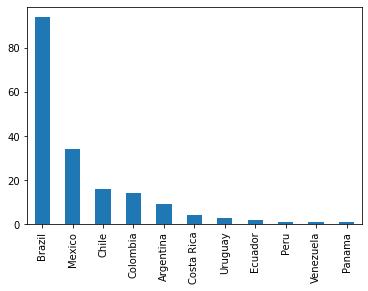

In [24]:
df_latam['Country'].value_counts(dropna=False).plot(kind='bar');

In [25]:
df_latam['Industry'].value_counts(dropna=False)

Construction                    7
Health, Wellness and Fitness    6
Human Resources                 6
Facilities Services             6
Marketing and Advertising       6
                               ..
Program Development             1
Textiles                        1
Building Materials              1
Industrial Automation           1
Medical Practice                1
Name: Industry, Length: 86, dtype: int64

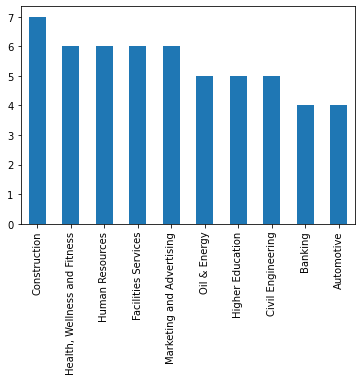

In [26]:
df_latam['Industry'].value_counts(dropna=False).head(10).plot(kind='bar');

In [27]:
df_latam['CurrentRole'].value_counts(dropna=False)

NaN                                                   161
vp                                                      1
supervisor regional no and ne                           1
desarrolador web (front-end) independiente              1
sap fico consultant                                     1
customer service representative i                       1
project manager                                         1
latam treasury services technology                      1
chief executive officer                                 1
master franchise owner and country general manager      1
regional sales manager                                  1
vice president for latin america                        1
intern                                                  1
vice president latin america                            1
porftfolio manager                                      1
distribui√ß√£o                                          1
publicidad y marketing- programaci√≥n                   1
software valid

### Second idea: create a new column Score that is the multiplication of NumberOfConnections and NumberOfRecommendations

In [28]:
# Adding 1 on each number to avoid multiplication by ZERO:
df_latam['Score'] = (df_latam['NumberOfConnections']+1) * (df_latam['NumberOfRecommendations']+1)

/Users/alex.keila/opt/anaconda3/envs/obp_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


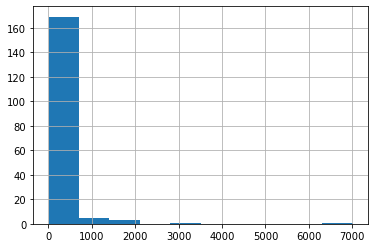

In [29]:
df_latam['Score'].hist();

## Listing the TOP 100 people from LATAM Countries with the higher Score:

In [30]:
df_top_100 = df_latam.sort_values(by=['Score', 'NumberOfConnections', 'NumberOfRecommendations'], ascending=False).head(100)
df_top_100

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections,Score
900,644143040,luiz roberto,pires,NaN,Brazil,Automotive,13,500,7014
2147,644543448,mariana,gon√ßalves,NaN,Brazil,Higher Education,6,500,3507
2628,644064788,marco,bazalar reyes,NaN,Peru,Broadcast Media,4,406,2035
1715,644904290,marcela,achig,NaN,Costa Rica,Program Development,8,168,1521
2453,644317375,agustin humberto,lares ponce,NaN,Mexico,Automotive,2,500,1503
...,...,...,...,...,...,...,...,...,...
955,644564360,reparaci√≥n de pc,x,NaN,Uruguay,Information Technology and Services,0,10,11
2623,644477644,mauricio,rogel correia,NaN,Brazil,Retail,0,10,11
1365,644899585,ramon mauricio,labrin fuentes,NaN,Chile,Broadcast Media,0,8,9
2550,644645327,alfredo messias,vieira martins,NaN,Brazil,Business Supplies and Equipment,0,8,9


## Saving the final result on people.out:

In [31]:
df_top_100[['PersonId']].to_csv('people.out', index=False)

In [32]:
# checking with the file was saved correctly
pd.read_csv('people.out')

,PersonId
0,644143040
1,644543448
2,644064788
3,644904290
4,644317375
...,...
95,644564360
96,644477644
97,644899585
98,644645327
